# Data: Past, Present, Future
# Lab 11b: Fairness, accountability, transparency
    

### What has our technological monster wrought?

page-rank plus structural inequality plus racism equals....

anybody? 

Bueller?

anybody?

Racism!

![cover](https://ingram-nyu.imgix.net/covers/9781479837243.jpg?auto=format&w=298&fit=max&q=80&dpr=1.1)

## What is to be done?

Way back in the neolithic era of 2013, people come together think through Fairness, Accountability, and Transparency in Machine learning. 

### [Principles for Accountable Algorithms](http://www.fatml.org/resources/principles-for-accountable-algorithms)
>Automated decision making algorithms are now used throughout industry and government, underpinning many processes from dynamic pricing to employment practices to criminal sentencing. [...] Accountability in this context includes an obligation to report, explain, or justify algorithmic decision-making as well as mitigate any negative social impacts or potential harms.
[...]


+ Responsibility
>Make available externally visible avenues of redress for adverse individual or societal effects of an algorithmic decision system, and designate an internal role for the person who is responsible for the timely remedy of such issues.

+ Explainability
>Ensure that algorithmic decisions as well as any data driving those decisions can be explained to end-users and other stakeholders in non-technical terms.

+ Accuracy
>Identify, log, and articulate sources of error and uncertainty throughout the algorithm and its data sources so that expected and worst case implications can be understood and inform mitigation procedures.

+ Auditability
> Enable interested third parties to probe, understand, and review the behavior of the algorithm through disclosure of information that enables monitoring, checking, or criticism, including through provision of detailed documentation, technically suitable APIs, and permissive terms of use.

+ Fairness
> Ensure that algorithmic decisions do not create discriminatory or unjust impacts when comparing across different demographics (e.g. race, sex, etc).


# Fairness


## Two major doctrines in US law

### Disparate treatment

> one kind of unlawful discrimination in US labor law. In the United States, it means unequal behavior toward someone *because of* a protected characteristic (e.g. race or gender) under Title VII of the United States Civil Rights Act.  (h/t wikipedia)

Disparate treatment is a form of *procedural* justice, concerned with process. 

- discrimination built into a process

    - formal: explicitly using class membership, OR

    - intentional: *purposefully* attempting to discriminate without direct reference to class membership
        - use zipcodes rather than race *deliberately* to exclude from your country club
    
- equality of *opportunity*


## Disparate impact 

>in United States labor law refers to practices in employment, housing, and other areas that adversely affect one group of people of a protected characteristic more than another, even though rules applied by employers or landlords are formally neutral. Although the protected classes vary by statute, most federal civil rights laws protect based on race, color, religion, national origin, and sex as protected traits, and some laws include disability status and other traits as well. (h/t wikipedia)

Disparate impact is a form of *distributive* justice, concerned with the outcomes of processes.

- equality of outcome

- substantial justice

>disparate impact is not, in and of itself, illegal.  This is because disparate impact only becomes illegal if the employer cannot justify the employment practice causing the adverse impact as a "job related for the position in question and consistent with business necessity" (called the "business necessity defense"). (h/t wikipedia)


Let's look at a much studied example: the "adult" data set. Task is to predict whether person makes >$50K, in order to make decisions just as  giving credit or the like.
(https://archive.ics.uci.edu/ml/datasets/adult)

Paper examining: 

> Michael Feldman, Sorelle A. Friedler, John Moeller, Carlos Scheidegger, and Suresh Venkatasubramanian. Certifying and Removing Disparate Impact. Proceedings of the 21st ACM SIGKDD International Conference on Knowledge Discovery and Data Mining, 2015. (http://arxiv.org/abs/1412.3756)

Their awesome code: (https://github.com/algofairness/fairness-comparison/tree/master/algorithms)

Kaggle competition (https://www.kaggle.com/uciml/adult-census-income) 


In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
plt.style.use
plt.rcParams['figure.figsize'] = (15, 5)

In [2]:
names = ['age','workclass', 'fnlwgt', 'education', 'education.num', 'marital.status','occupation', 'relationship','race','sex','capital.gain','capital.loss', 'hours.per.week', 'native.country','income']

In [3]:
data=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', sep=',', header=None, na_values="?", names=names)

In [4]:
data.head(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
data.groupby(["race","income"]).size()

race                 income
 Amer-Indian-Eskimo   <=50K      275
                      >50K        36
 Asian-Pac-Islander   <=50K      763
                      >50K       276
 Black                <=50K     2737
                      >50K       387
 Other                <=50K      246
                      >50K        25
 White                <=50K    20699
                      >50K      7117
dtype: int64

In [6]:
data.groupby(["sex", "income"]).size()

sex      income
 Female   <=50K     9592
          >50K      1179
 Male     <=50K    15128
          >50K      6662
dtype: int64

In [7]:
data.groupby(["education", "income"]).size()

education      income
 10th           <=50K     871
                >50K       62
 11th           <=50K    1115
                >50K       60
 12th           <=50K     400
                >50K       33
 1st-4th        <=50K     162
                >50K        6
 5th-6th        <=50K     317
                >50K       16
 7th-8th        <=50K     606
                >50K       40
 9th            <=50K     487
                >50K       27
 Assoc-acdm     <=50K     802
                >50K      265
 Assoc-voc      <=50K    1021
                >50K      361
 Bachelors      <=50K    3134
                >50K     2221
 Doctorate      <=50K     107
                >50K      306
 HS-grad        <=50K    8826
                >50K     1675
 Masters        <=50K     764
                >50K      959
 Preschool      <=50K      51
 Prof-school    <=50K     153
                >50K      423
 Some-college   <=50K    5904
                >50K     1387
dtype: int64

### We're only going to want to train on some of the features.

In [8]:
features = ['age','workclass','education','marital.status','occupation','education.num','race','sex','relationship','capital.gain','capital.loss','native.country','income']

In [9]:
## have to do some data jujitsu
## converts strings to numerical values
## from https://www.kaggle.com/dewilliams/ml-adult-income

from sklearn.preprocessing import LabelEncoder

def preprocess_features(dframe):
    
    for column in dframe:
        enc = LabelEncoder()
        if(column not in ['age','education.num','fnlwgt','capital.gain','capital.loss','hours.per.week']):
            dframe[column] = enc.fit_transform(dframe[column])
    return dframe

In [10]:
data=data[features]
#reduce our data to just the columns specified in `features`

In [11]:
data = preprocess_features(data)
#convert strings to numbers for easier computation

In [12]:
data.head(10)

,age,workclass,education,marital.status,occupation,education.num,race,sex,relationship,capital.gain,capital.loss,native.country,income
0,39,7,9,4,1,13,4,1,1,2174,0,39,0
1,50,6,9,2,4,13,4,1,0,0,0,39,0
2,38,4,11,0,6,9,4,1,1,0,0,39,0
3,53,4,1,2,6,7,2,1,0,0,0,39,0
4,28,4,9,2,10,13,2,0,5,0,0,5,0
5,37,4,12,2,4,14,4,0,5,0,0,39,0
6,49,4,6,3,8,5,2,0,1,0,0,23,0
7,52,6,11,2,4,9,4,1,0,0,0,39,1
8,31,4,12,4,10,14,4,0,1,14084,0,39,1
9,42,4,9,2,4,13,4,1,0,5178,0,39,1


In [13]:
# works better if extract from pandas dataframe
# separate the existing classification (the diagnosis) from the features tested
# this should be a familiar split into X and y, what we want to predict
data_array=data.values
y = data['income']
X = data.drop('income', axis=1)

In [14]:
#just copying technique we saw in earlier lab
#load classifier

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split

#divide into training and testing data

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.45, random_state=42)

# train the classifier
dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(X_train, y_train) #fit on training data

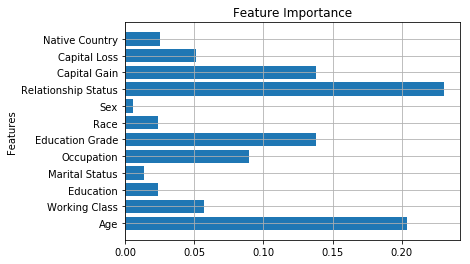

In [15]:
# display the relative importance of each attribute
relval = clf.feature_importances_

# horizontal bar plot of feature importance
pos = np.arange(12) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('Age','Working Class','Education','Marital Status','Occupation','Education Grade','Race','Sex','Relationship Status','Capital Gain','Capital Loss','Native Country'))
plt.grid(True)

In case you're wondering, check this out: https://medium.com/the-artificial-impostor/feature-importance-measures-for-tree-models-part-i-47f187c1a2c3

# What have we trained the decision tree to to do?


# What sorts of fairness is this likely to fail?

In [16]:
X_test.head(10)

,age,workclass,education,marital.status,occupation,education.num,race,sex,relationship,capital.gain,capital.loss,native.country
14160,27,4,15,0,1,10,4,0,1,0,0,39
27048,45,7,11,2,4,9,4,0,5,0,0,39
28868,29,4,9,2,4,13,2,1,0,0,0,39
5667,30,4,9,4,7,13,4,0,1,0,0,39
7827,29,6,15,0,3,10,4,1,1,2202,0,39
15382,51,4,12,2,10,14,4,1,0,0,0,39
4641,58,6,11,2,4,9,4,1,0,15024,0,39
8943,22,4,11,4,1,9,3,0,1,0,0,39
216,50,4,7,0,12,12,4,0,1,0,0,39
5121,50,4,11,2,3,9,4,1,0,3103,0,39


Now let's pick out just all the rows with sex = 1. Note the syntax and especially the double = (==) 

In [17]:
X_test[X_test["sex"]==1]

,age,workclass,education,marital.status,occupation,education.num,race,sex,relationship,capital.gain,capital.loss,native.country
28868,29,4,9,2,4,13,2,1,0,0,0,39
7827,29,6,15,0,3,10,4,1,1,2202,0,39
15382,51,4,12,2,10,14,4,1,0,0,0,39
4641,58,6,11,2,4,9,4,1,0,15024,0,39
5121,50,4,11,2,3,9,4,1,0,3103,0,39
345,43,6,9,4,12,13,4,1,1,0,0,39
31900,37,4,11,0,6,9,4,1,1,0,0,39
20010,41,4,9,4,10,13,4,1,1,0,0,39
8966,43,4,8,2,4,11,4,1,0,3103,0,39
1912,52,5,14,2,4,15,4,1,0,0,0,39


In [18]:
clf.predict(X_test).mean()

0.23114720535044017

In [19]:
clf.predict(X_test[X_test["sex"]==0]).mean()

0.10998761865456046

In [20]:
clf.predict(X_test[X_test["sex"]==1]).mean()

0.29101662078107476

In [21]:
clf.predict(X_test[X_test["race"]==0]).mean()

0.1891891891891892

In [22]:
clf.predict(X_test[X_test["race"]==1]).mean()

0.2602739726027397

In [23]:
for i in range(4):
    print(clf.predict(X_test[X_test["race"]==i]).mean())

0.1891891891891892
0.2602739726027397
0.13171449595290655
0.1322314049586777


# Disparate impact operationalized as "80-20 rule"


Look at *ratio* of impact of a procedure. 

If hire 20 women for every 50 men, ratio is 20/50 which equals .4. 

40% < 80%

Therefore, 

hiring practices have disparate impact *even if there is no deliberate discrimination using protected attributes*

**Still can be 20% discriminated against!!**




## What if we rebuilt our classifier without ever looking at legally protected attributes?

### Don't let our classifier use the features race and sex.

Those are protected attributes with which we cannot descriminate *intentionally*.

In [24]:
protected_attributes=['race', 'sex']

In [25]:
X_protected = data.drop(protected_attributes, axis=1)

In [26]:
#train anew

from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_protected, y, test_size=0.45, random_state=42)

dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(X_train, y_train) #fit on training data

In [27]:
clf.predict(X_test).mean()

0.24008735412543505

In [28]:
clf.predict(X_test[X["sex"]==0]).mean()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.10647957078002476

In [29]:
clf.predict(X_test[X["sex"]==1]).mean()

/Applications/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


0.3061078821250127

## What sort of *fairness* does this fail?

# Auditing a black box model

### the case of COMPAS

In a 2016 [article]("https://www.propublica.org/article/machine-bias-risk-assessments-in-criminal-sentencing") on Propublica, the authors announced, there's "software used across the country to predict future criminals. And it’s biased against blacks." The proprietary software in question was COMPAS (Correctional Offender Management Profiling for Alternative Sanctions) that sought to provide judges and other officials predictions about recidivism based on a number of factors. Because the algorithm is proprietary, it is a commercial black box if not an epistemological one.

Combining records from freedom of information requests in Florida and arrest records, the team of journalists and data scientists used *supervised learning* to build a model capable of fairly accurately reproducing the predictions of the COMPAS algorithm.

Previously we've seen how *supervised learning* models the judgment of human experts without claiming to replicate their reasoning processes. Same thing here, but reproducing the products of a different algorithm.

A key result was:
>In forecasting who would re-offend, the algorithm made mistakes with black and white defendants at roughly the same rate but in very different ways.

>+ The formula was particularly likely to falsely flag black defendants as future criminals, wrongly labeling them this way at almost twice the rate as white defendants.
+ White defendants were mislabeled as low risk more often than black defendants.

Let's take a look at what that involves.

The team described its process in a detailed [blogpost]("https://www.propublica.org/article/how-we-analyzed-the-compas-recidivism-algorithm") and [notebook]("https://github.com/propublica/compas-analysis/blob/master/Compas%20Analysis.ipynb"). 

Let's just reproduce a bit of what they did.


In [30]:
## h/t https://github.com/adebayoj/fairml for the easier to use data
# read in the propublica data, as made available by adebayoj
propublica_data = pd.read_csv("https://raw.githubusercontent.com/adebayoj/fairml/master/doc/example_notebooks/propublica_data_for_fairml.csv")


In [31]:
propublica_data[100:110]

,Two_yr_Recidivism,Number_of_Priors,score_factor,Age_Above_FourtyFive,Age_Below_TwentyFive,African_American,Asian,Hispanic,Native_American,Other,Female,Misdemeanor
100,1,0,0,0,1,1,0,0,0,0,0,0
101,1,28,1,0,0,1,0,0,0,0,0,0
102,0,1,1,0,0,1,0,0,0,0,0,1
103,0,1,0,0,0,0,0,0,0,1,1,0
104,1,13,1,0,0,0,0,0,0,0,0,0
105,1,3,1,0,0,1,0,0,0,0,0,0
106,0,3,1,1,0,0,0,0,0,0,0,1
107,1,19,1,0,0,1,0,0,0,0,0,0
108,0,6,0,0,0,0,0,0,0,0,0,0
109,0,2,0,0,0,0,0,0,0,0,1,0


In [32]:
# separate features for predicting and the ratings to predict
compas_rating = propublica_data.score_factor.values     # we've been calling this y
propublica_data = propublica_data.drop("score_factor", 1)  # we've been calling this X

In [33]:
# now we could do any kind of supervised learning model we want. They used logistic regression.
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(penalty='l2', C=0.01)
clf.fit(propublica_data.values, compas_rating)

/Applications/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
#or a decision tree
dt = DecisionTreeClassifier() #set up classifier, with all **default** values
clf=dt.fit(propublica_data.values, compas_rating)

In [35]:
relval = clf.feature_importances_

In [36]:
relval

array([0.04821047, 0.48708447, 0.06606706, 0.20895084, 0.04690349,
       0.00425801, 0.02846804, 0.00176451, 0.02499399, 0.03737489,
       0.04592423])

In [37]:
propublica_data.columns

Index(['Two_yr_Recidivism', 'Number_of_Priors', 'Age_Above_FourtyFive',
       'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic',
       'Native_American', 'Other', 'Female', 'Misdemeanor'],
      dtype='object')

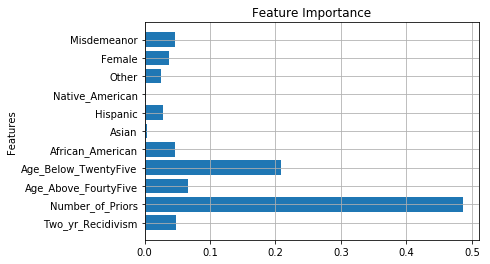

In [38]:
# horizontal bar plot of feature importance
pos = np.arange(11) + 0.5
plt.barh(pos, relval, align='center')
plt.title("Feature Importance")
plt.xlabel("")
plt.ylabel("Features")
plt.yticks(pos, ('Two_yr_Recidivism', 'Number_of_Priors', 'Age_Above_FourtyFive',
       'Age_Below_TwentyFive', 'African_American', 'Asian', 'Hispanic',
       'Native_American', 'Other', 'Female', 'Misdemeanor'))
plt.grid(True)

# so what?

Cynthia Rudin:

>ProPublica created a linear explanation model for COMPAS that depended on race, and then accused the black box COMPAS model of depending on race, conditioned on age and criminal history. In fact, COMPAS seems to be nonlinear, and it is entirely possible that COMPAS does not depend on race (beyond its correlations with age and criminal history). .  ProPublica’s linear model was not truly an “explanation” for COMPAS, and they should not have concluded that their explanation model uses the same important features as the black box it was approximating. [...] Let us stop calling approximations to black box model predictions explanations. For a model that does not use race explicitly, an automated explanation “This model predicts you will be arrested because you are black” is not an explanation of what the model is actually doing, and would be confusing to a judge, lawyer or defendant. 